In [1]:
import random
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
import scipy
from scipy import stats
import seaborn

In [2]:
data=pd.read_csv('trip.csv')
print(len(data))
data.head(10)

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


Univariate analysis

<AxesSubplot:title={'center':'distribution of user types'}, xlabel='usertype'>

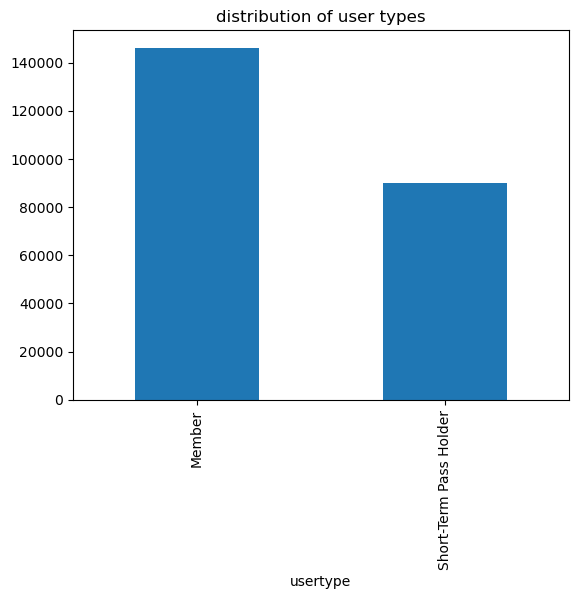

In [3]:
groupby_user=data.groupby('usertype').size()
groupby_user.plot.bar(title='distribution of user types')

<AxesSubplot:title={'center':'distribution of genders'}, xlabel='gender'>

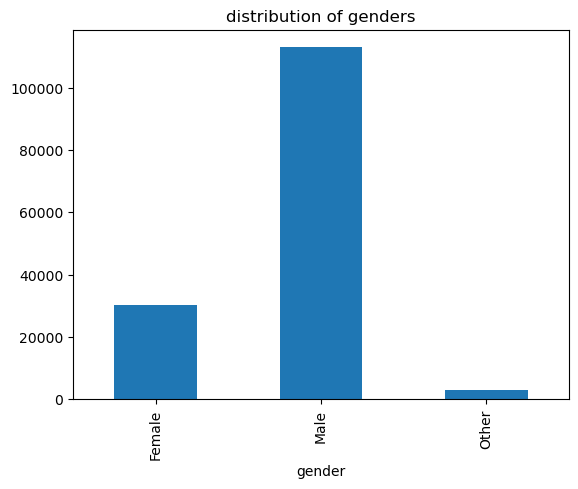

In [4]:
groupby_gender=data.groupby('gender').size()
groupby_gender.plot.bar(title='distribution of genders')

<AxesSubplot:title={'center':'distribution of birth years'}, xlabel='birthyear'>

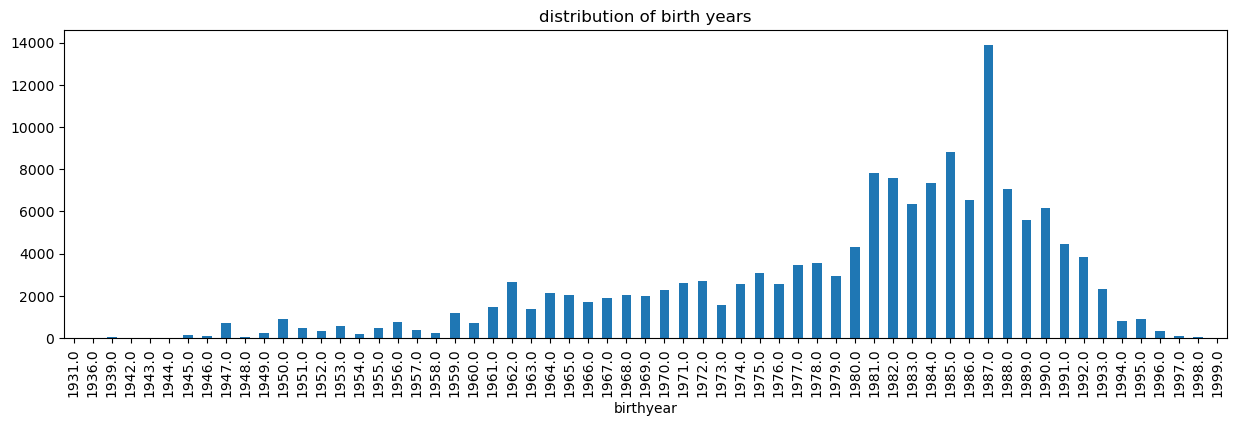

In [5]:
groupby_birthyear=data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='distribution of birth years',figsize=(15,4))

<AxesSubplot:title={'center':'distribution of user types'}, xlabel='usertype'>

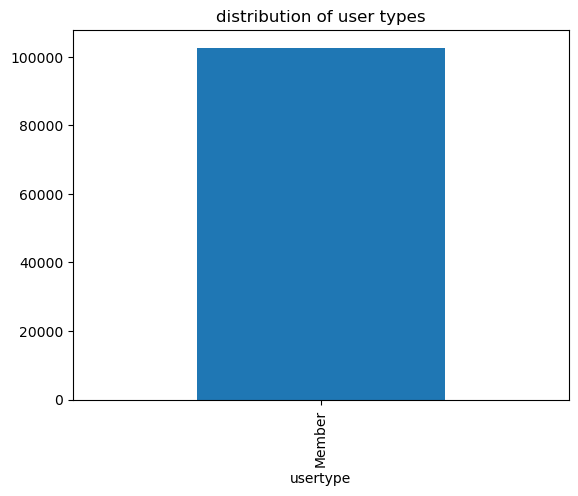

In [6]:
data_mil=data[(data['birthyear']>=1977)& (data['birthyear']<=1994)]
groupby_mil=data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='distribution of user types')

Multivariate analysis

<AxesSubplot:title={'center':'distribution of birth years by genders'}, xlabel='birthyear'>

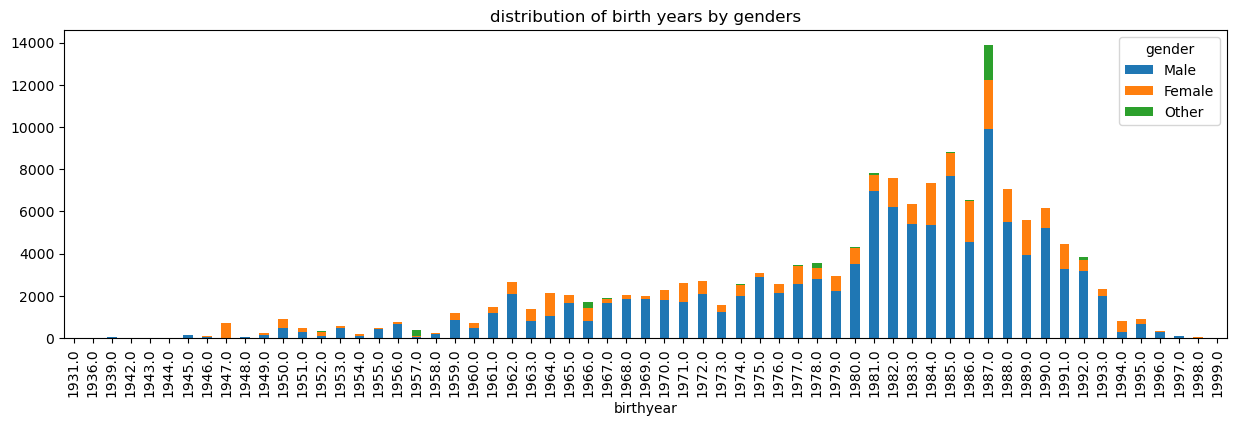

In [7]:
groupby_birthyear_gender=data.groupby(['birthyear','gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title="distribution of birth years by genders",stacked=True,figsize=(15,4))


<AxesSubplot:title={'center':'distribution of birth years by usertypes'}, xlabel='birthyear'>

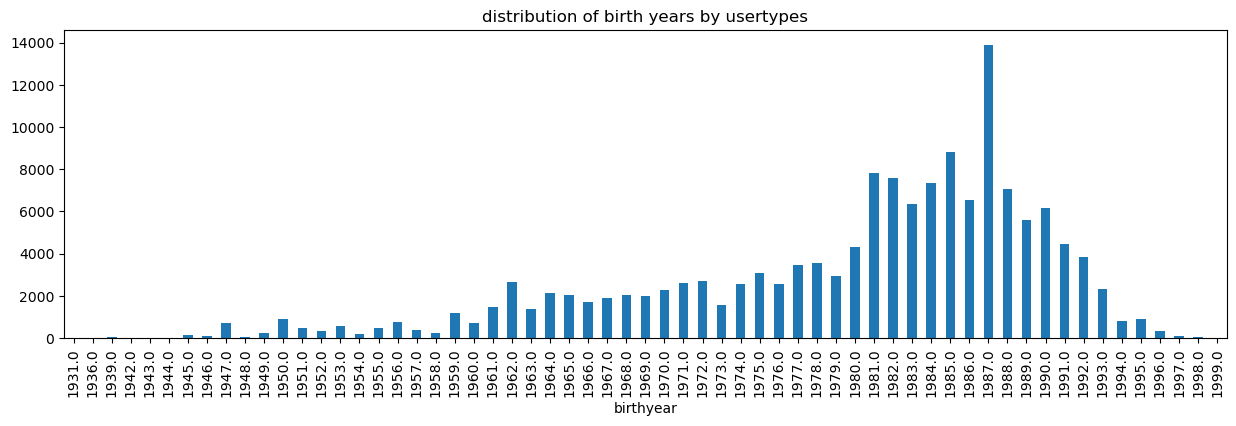

In [8]:
groupby_birthyear_utype=data.groupby(['birthyear','usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_utype['Member'].plot.bar(title="distribution of birth years by usertypes",stacked=True,figsize=(15,4))


In [9]:
listt=list(data['starttime'])
listt=[datetime.datetime.strptime(x,"%m/%d/%Y  %H:%M") for x in listt]
data['starttime_mod']=pd.Series(listt,index=data.index)
data['starttime_date']=pd.Series([x.date() for x in listt],index=data.index)
data['starttime_year']=pd.Series([x.year for x in listt],index=data.index)
data['starttime_month']=pd.Series([x.month for x in listt],index=data.index)
data['starttime_day']=pd.Series([x.day for x in listt],index=data.index)
data['starttime_hour']=pd.Series([x.hour for x in listt],index=data.index)

<AxesSubplot:title={'center':'distribution trip duration by date'}, xlabel='starttime_date'>

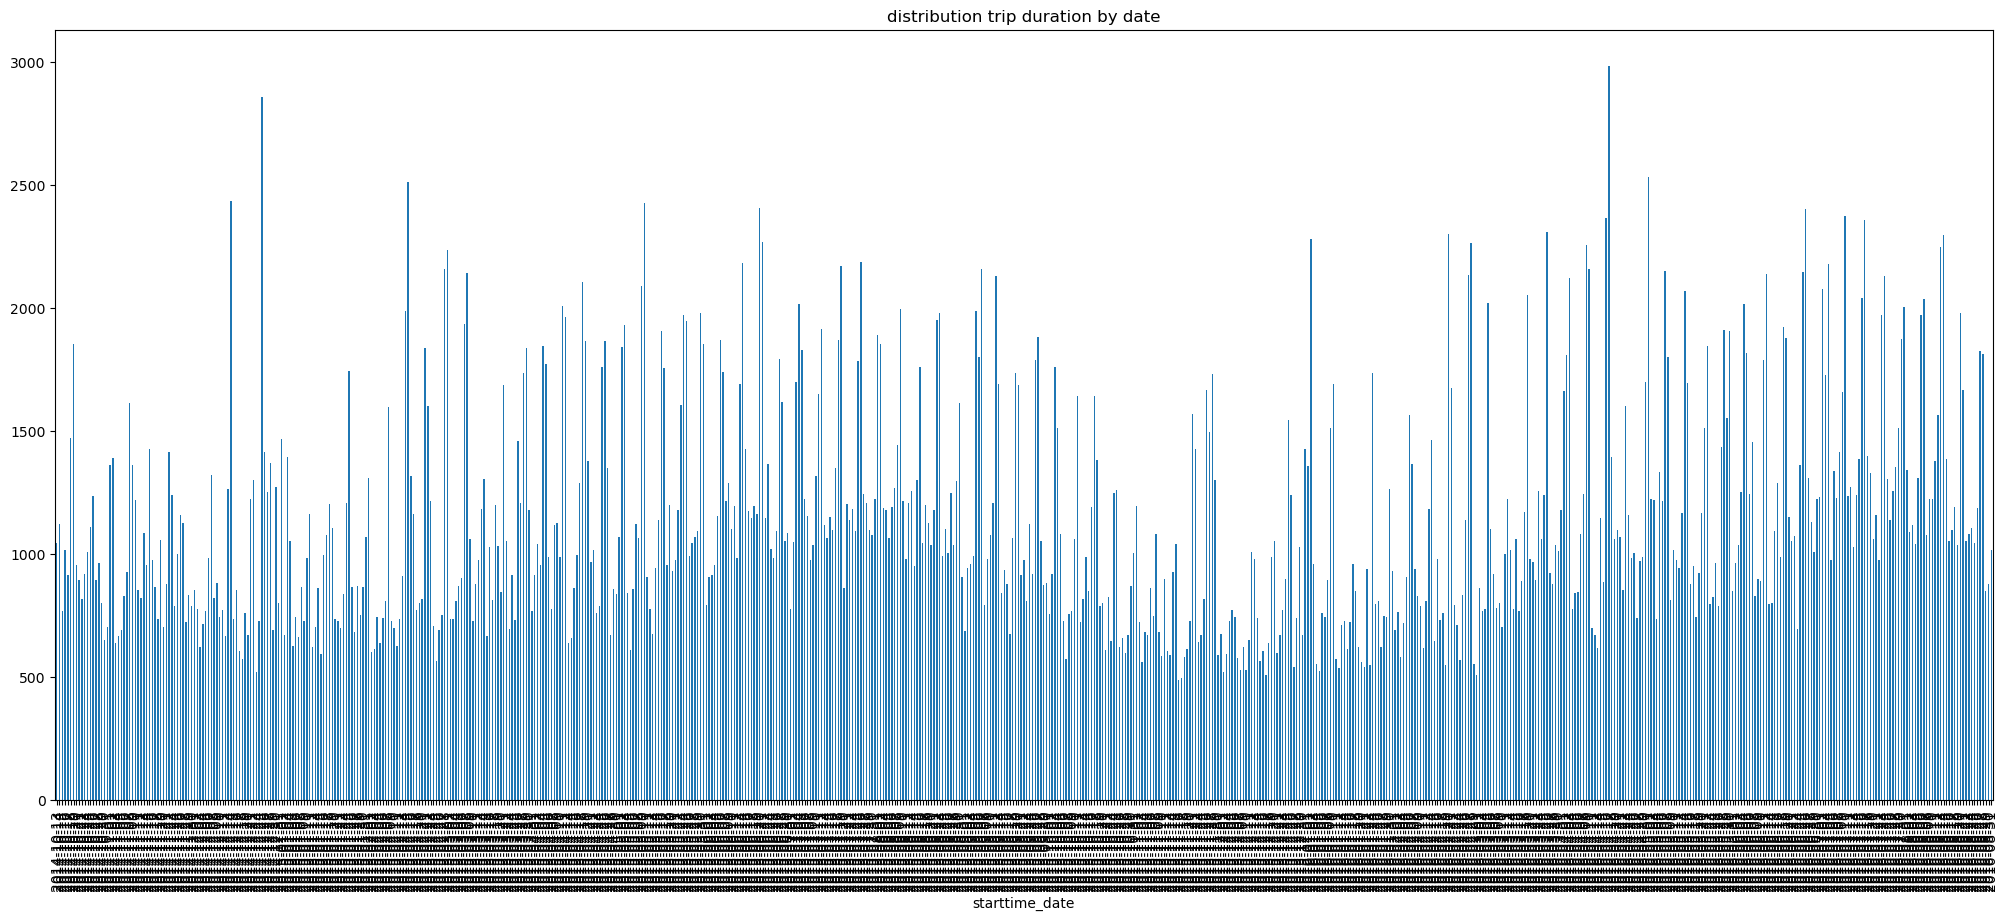

In [10]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title='distribution trip duration by date',figsize=(25,10))

<AxesSubplot:title={'center':'distribution of starttime_year'}, xlabel='starttime_year'>

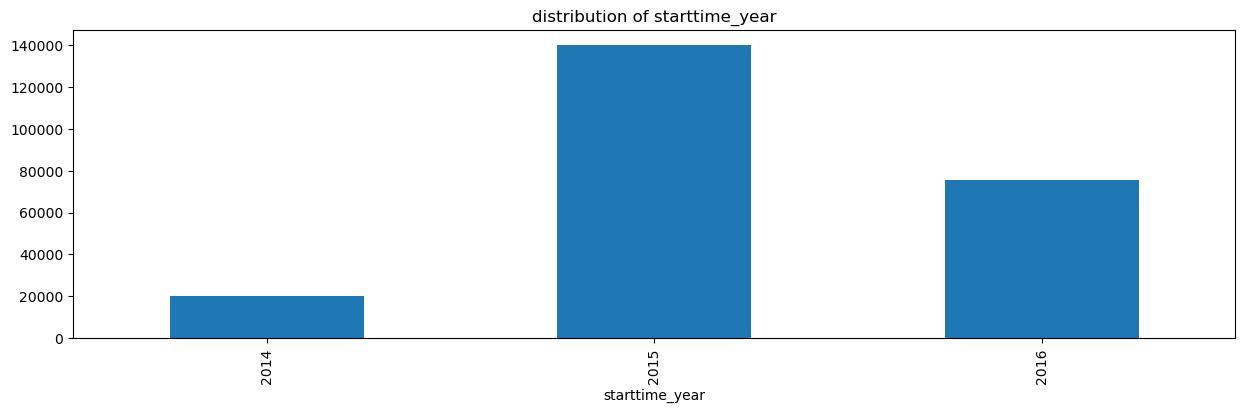

In [11]:
groupby_year=data.groupby('starttime_year').size()
groupby_year.plot.bar(title='distribution of starttime_year',figsize=(15,4))

<AxesSubplot:title={'center':'distribution of starttime_month'}, xlabel='starttime_month'>

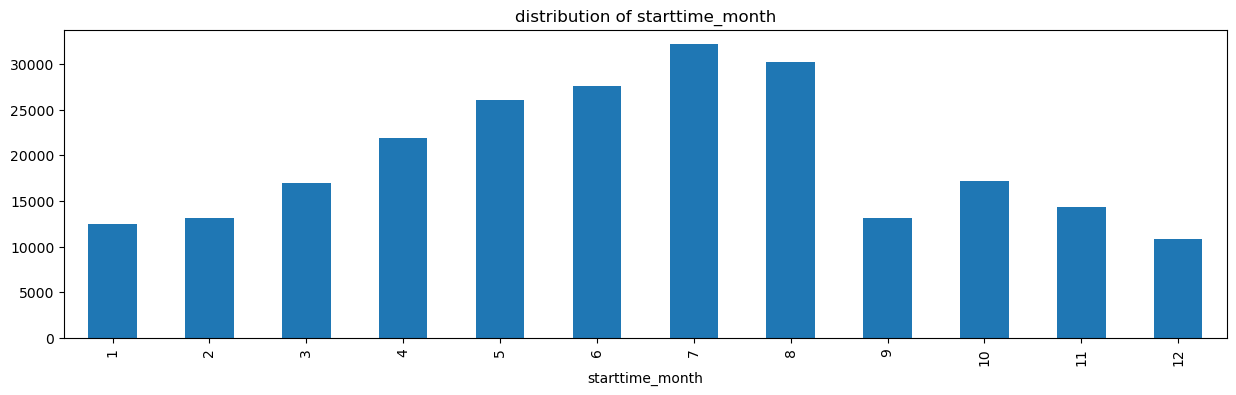

In [12]:
groupby_month=data.groupby('starttime_month').size()
groupby_month.plot.bar(title='distribution of starttime_month',figsize=(15,4))

<AxesSubplot:title={'center':'distribution of starttime_day'}, xlabel='starttime_day'>

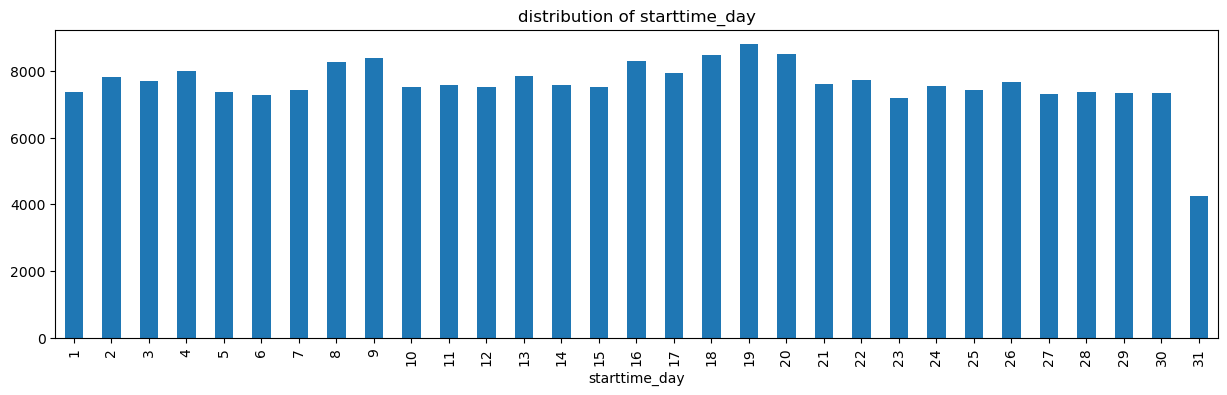

In [13]:
groupby_day=data.groupby('starttime_day').size()
groupby_day.plot.bar(title='distribution of starttime_day',figsize=(15,4))

<AxesSubplot:title={'center':'distribution of starttime_hour'}, xlabel='starttime_hour'>

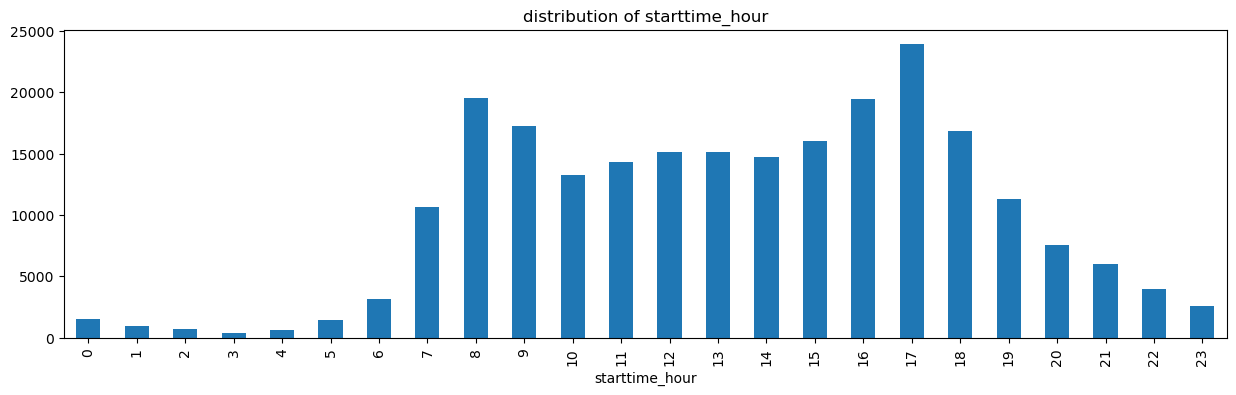

In [14]:
groupby_hour=data.groupby('starttime_hour').size()
groupby_hour.plot.bar(title='distribution of starttime_hour',figsize=(15,4))

In [15]:
trip_duration=list(data['tripduration'])
station_from=list(data['from_station_name'])
print('mean of trip duration  ',statistics.mean(trip_duration))
print('median of trip duration  ',statistics.median(trip_duration))
print('mode of station from  ',statistics.mode(station_from))

mean of trip duration   1202.6122102556499
median of trip duration   633.235
mode of station from   Pier 69 / Alaskan Way & Clay St


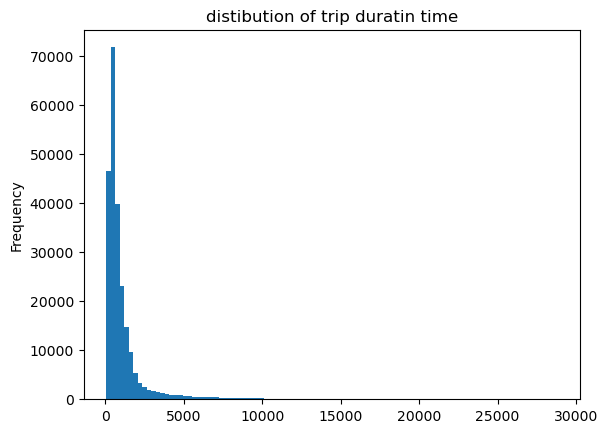

In [19]:
data['tripduration'].plot.hist(bins=100,title='distibution of trip duratin time')
plt.show()